# Mini_Project_Austin_Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
plt.rcParams["figure.figsize"] = (20,15)

In [2]:
df = pd.read_csv('austin_crime.csv')

In [3]:
df.drop_duplicates(inplace=True)

In [4]:
df

,address,census_tract,clearance_date,clearance_status,council_district_code,description,district,latitude,location,location_description,longitude,primary_type,timestamp,unique_key,x_coordinate,y_coordinate,year,zipcode
0,2620 RIO GRANDE ST Austin TX 78705,6.03,2015-12-14 00:00:00,Not cleared,9.0,THEFT,B,NaN,NaN,2620 RIO GRANDE ST,NaN,Theft,2015-12-13 00:00:00,2.015505e+10,3113531.0,10079579.0,2015.0,78705.0
1,9500 S IH 35 SVRD SB Austin TX 78748,24.21,2015-09-14 00:00:00,Cleared by Arrest,5.0,THEFT BY SHOPLIFTING,F,NaN,NaN,9500 S IH 35 SVRD SB,NaN,Theft,2015-09-03 00:00:00,2.015246e+10,3099459.0,10032098.0,2015.0,78748.0
2,1000 E 41ST ST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Austin TX 78751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,(30.298356 -97.719647),3.02,2014-07-29 00:00:00,Cleared by Arrest,9.0,THEFT BY SHOPLIFTING,B,30.298356,(30.298356-97.719647),1000 E 41ST ST,-97.719647,Theft: Shoplifting,2014-04-04 00:00:00,2.014941e+09,3121345.0,10082705.0,2014.0,78751.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159456,(30.405797 -97.74491),17.54,2015-01-04 00:00:00,Not cleared,7.0,AGG ASLT ENHANC STRANGL/SUFFOC,A,30.405797,(30.405797-97.74491),11111 RESEARCH BLVD SVRD NB,-97.744910,Aggravated Assault,2014-12-28 00:00:00,2.014362e+10,3112507.0,10120833.0,2014.0,78759.0
159459,(30.207396 -97.728709),24.31,2014-06-04 00:00:00,Not cleared,2.0,THEFT OF METAL,F,30.207396,(30.207396-97.728709),4000 CAVEN RD,-97.728709,Theft: All Other Larceny,2014-06-03 00:00:00,2.014502e+10,3119195.0,10048844.0,2014.0,78744.0
159460,10713 JOLLYVILLE RD Austin TX 78759,17.22,2016-01-12 00:00:00,Not cleared,10.0,THEFT BY SHOPLIFTING,A,NaN,NaN,10713 JOLLYVILLE RD,NaN,Theft,2015-12-30 00:00:00,2.015506e+10,3111397.0,10118845.0,2015.0,78759.0
159461,1712 TIMBER RIDGE DR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102158 entries, 0 to 159463
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   address                102158 non-null  object 
 1   census_tract           84430 non-null   object 
 2   clearance_date         81392 non-null   object 
 3   clearance_status       81383 non-null   object 
 4   council_district_code  84358 non-null   float64
 5   description            84786 non-null   object 
 6   district               84773 non-null   object 
 7   latitude               34411 non-null   float64
 8   location               34411 non-null   object 
 9   location_description   78074 non-null   object 
 10  longitude              34411 non-null   float64
 11  primary_type           79116 non-null   object 
 12  timestamp              73544 non-null   object 
 13  unique_key             73544 non-null   float64
 14  x_coordinate           72273 non-nul

In [6]:
df.isnull().sum()

address                      0
census_tract             17728
clearance_date           20766
clearance_status         20775
council_district_code    17800
description              17372
district                 17385
latitude                 67747
location                 67747
location_description     24084
longitude                67747
primary_type             23042
timestamp                28614
unique_key               28614
x_coordinate             29885
y_coordinate             29885
year                     28614
zipcode                  28957
dtype: int64

## Question
1. ลักษณะการเกิดอาชญากรรมต่อพื้นที่
2. ความถี่ของอาชญากรรมเมื่ออิงจากสภาพเศษฐกิจ

เริ่มต้นจากการลอง plot สถานที่จากทั้ง x,y coordinate และ latitude, longtitude โดยสรุปเลือกใช้ x,y coordinate เพราะ มีจำนวนข้อมูลที่ไม่ใช้ null มากกว่า

In [7]:
xyco = df[pd.notnull(df['x_coordinate'])].loc[pd.notnull(df['y_coordinate'])][['x_coordinate','y_coordinate']]

In [8]:
xyco

,x_coordinate,y_coordinate
0,3113531.0,10079579.0
1,3099459.0,10032098.0
4,3121345.0,10082705.0
5,3110518.0,10052730.0
6,3115006.0,10043258.0
...,...,...
159453,3144046.0,10117185.0
159456,3112507.0,10120833.0
159459,3119195.0,10048844.0
159460,3111397.0,10118845.0


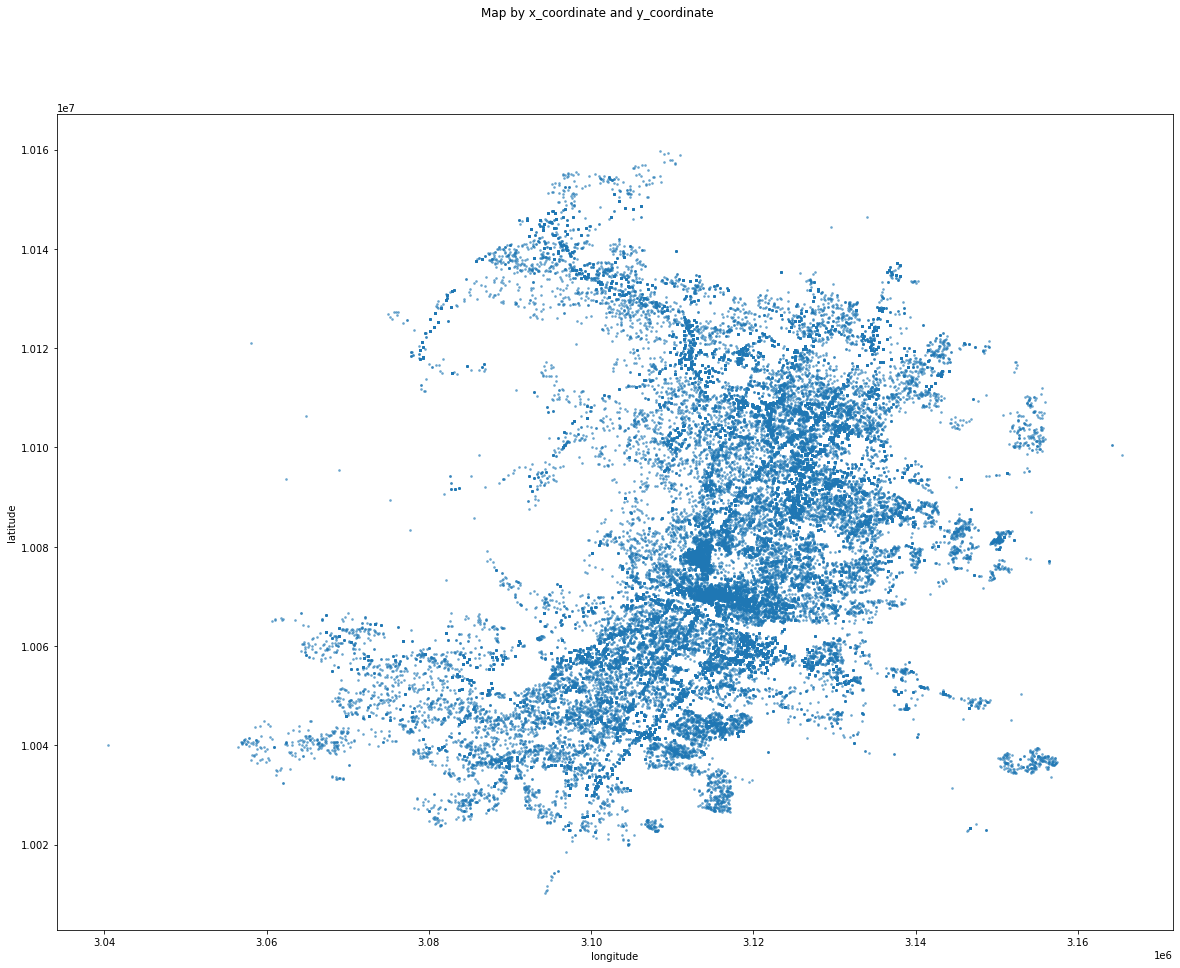

In [9]:
fig, ax = plt.subplots()
ax.scatter(xyco['x_coordinate'].values, xyco['y_coordinate'].values,
             s=3, label='map', alpha=0.5)
fig.suptitle('Map by x_coordinate and y_coordinate')

ax.set_ylabel('latitude')
ax.set_xlabel('longitude')

plt.show()

### 1.แบ่งแยกลักษณะการเกิดอาชญากรรม ตามพื้นที่

เลือกการนำข้อมูลจาก description มาหาว่ามีอาชญากรรมแบบใดบ้างและแบ่งออกเป็น 6 แบบ 

In [10]:
df.description.unique()

array(['THEFT', 'THEFT BY SHOPLIFTING', nan, 'BURGLARY OF VEHICLE',
       'AUTO THEFT', 'BURGLARY NON RESIDENCE', 'THEFT FROM BUILDING',
       'AGG ASLT STRANGLE/SUFFOCATE', '2014', 'THEFT OF BICYCLE',
       'BURGLARY OF RESIDENCE', 'AGG ASSAULT FAM/DATE VIOLENCE',
       'THEFT OF LICENSE PLATE', 'THEFT OF VEHICLE/OTHER', 'AGG ASSAULT',
       'THEFT FROM AUTO', 'RAPE', 'THEFT FROM PERSON',
       'ROBBERY BY ASSAULT', 'AGG ROBBERY/DEADLY WEAPON',
       'THEFT OF AUTO PARTS', 'ROBBERY BY THREAT',
       'AGG ASLT ENHANC STRANGL/SUFFOC', 'THEFT OF HEAVY EQUIPMENT',
       'BURGLARY OF COIN-OP MACHINE', 'BURG NON RESIDENCE SHEDS',
       'THEFT OF METAL', 'MISAPPLY FIDUCIARY PROP', 'DEADLY CONDUCT',
       'RAPE OF A CHILD', 'AGG RAPE OF A CHILD', 'AGG RAPE',
       'TAKE WEAPON FRM POLICE OFFICER', 'BREACH OF COMPUTER SECURITY',
       'AGG ASSAULT WITH MOTOR VEH', 'AGG ASLT W/MOTOR VEH FAM/DAT V',
       'AGG ROBBERY BY ASSAULT', 'MANSLAUGHTER',
       'BURG OF RES - SEXUAL NATURE

In [11]:
df['Type1'] = df.apply(lambda x: 'THEFT' in str(x['description']),axis=1)

In [12]:
df.loc[df['Type1']].description.unique()

array(['THEFT', 'THEFT BY SHOPLIFTING', 'AUTO THEFT',
       'THEFT FROM BUILDING', 'THEFT OF BICYCLE',
       'THEFT OF LICENSE PLATE', 'THEFT OF VEHICLE/OTHER',
       'THEFT FROM AUTO', 'THEFT FROM PERSON', 'THEFT OF AUTO PARTS',
       'THEFT OF HEAVY EQUIPMENT', 'THEFT OF METAL',
       'THEFT CATALYTIC CONVERTER', 'THEFT/TILL TAPPING'], dtype=object)

In [13]:
df['Type2'] = df.apply(lambda x: 'BURG' in str(x['description']),axis=1)

In [14]:
df.loc[df['Type2']].description.unique()

array(['BURGLARY OF VEHICLE', 'BURGLARY NON RESIDENCE',
       'BURGLARY OF RESIDENCE', 'BURGLARY OF COIN-OP MACHINE',
       'BURG NON RESIDENCE SHEDS', 'BURG OF RES - SEXUAL NATURE'],
      dtype=object)

In [15]:
df['Type3'] = df.apply(lambda x: 'AGG' in str(x['description']),axis=1)

In [16]:
df.loc[df['Type3']].description.unique()

array(['AGG ASLT STRANGLE/SUFFOCATE', 'AGG ASSAULT FAM/DATE VIOLENCE',
       'AGG ASSAULT', 'AGG ROBBERY/DEADLY WEAPON',
       'AGG ASLT ENHANC STRANGL/SUFFOC', 'AGG RAPE OF A CHILD',
       'AGG RAPE', 'AGG ASSAULT WITH MOTOR VEH',
       'AGG ASLT W/MOTOR VEH FAM/DAT V', 'AGG ROBBERY BY ASSAULT',
       'AGG ASSAULT ON PUBLIC SERVANT'], dtype=object)

In [17]:
df['Type4'] = df.apply(lambda x: 'MURDER' in str(x['description']),axis=1)

In [18]:
df.loc[df['Type4']].description.unique()

array(['CAPITAL MURDER', 'MURDER'], dtype=object)

In [19]:
df['Type5'] = df.apply(lambda x: 'RAPE' in str(x['description']),axis=1)

In [20]:
df.loc[df['Type5']].description.unique()

array(['RAPE', 'RAPE OF A CHILD', 'AGG RAPE OF A CHILD', 'AGG RAPE'],
      dtype=object)

In [21]:
df['Type6'] = df.apply(lambda x: 'ROB' in str(x['description']),axis=1)

In [22]:
df.loc[df['Type6']].description.unique()

array(['ROBBERY BY ASSAULT', 'AGG ROBBERY/DEADLY WEAPON',
       'ROBBERY BY THREAT', 'AGG ROBBERY BY ASSAULT'], dtype=object)

In [23]:
df.loc[~df['Type6']].loc[~df['Type5']].loc[~df['Type4']].loc[~df['Type3']].loc[~df['Type2']].loc[~df['Type1']].description.unique()

array([nan, '2014', 'MISAPPLY FIDUCIARY PROP', 'DEADLY CONDUCT',
       'TAKE WEAPON FRM POLICE OFFICER', 'BREACH OF COMPUTER SECURITY',
       'MANSLAUGHTER', 'PURSE SNATCHING', 'DEADLY CONDUCT FAM/DATE VIOL',
       'AIRPORT - BREACH OF SECURITY'], dtype=object)

In [24]:
df_t1 = df.loc[df['Type1']].reset_index(drop=True)
df_t2 = df.loc[df['Type2']].reset_index(drop=True)
df_t3 = df.loc[df['Type3']].reset_index(drop=True)
df_t4 = df.loc[df['Type4']].reset_index(drop=True)
df_t5 = df.loc[df['Type5']].reset_index(drop=True)
df_t6 = df.loc[df['Type6']].reset_index(drop=True)


In [25]:
df_latlong_t1 = df_t1[pd.notnull(df_t1['x_coordinate'])].loc[pd.notnull(df_t1['y_coordinate'])]
df_latlong_t1

,address,census_tract,clearance_date,clearance_status,council_district_code,description,district,latitude,location,location_description,...,x_coordinate,y_coordinate,year,zipcode,Type1,Type2,Type3,Type4,Type5,Type6
0,2620 RIO GRANDE ST Austin TX 78705,6.03,2015-12-14 00:00:00,Not cleared,9.0,THEFT,B,NaN,NaN,2620 RIO GRANDE ST,...,3113531.0,10079579.0,2015.0,78705.0,True,False,False,False,False,False
1,9500 S IH 35 SVRD SB Austin TX 78748,24.21,2015-09-14 00:00:00,Cleared by Arrest,5.0,THEFT BY SHOPLIFTING,F,NaN,NaN,9500 S IH 35 SVRD SB,...,3099459.0,10032098.0,2015.0,78748.0,True,False,False,False,False,False
2,(30.298356 -97.719647),3.02,2014-07-29 00:00:00,Cleared by Arrest,9.0,THEFT BY SHOPLIFTING,B,30.298356,(30.298356-97.719647),1000 E 41ST ST,...,3121345.0,10082705.0,2014.0,78751.0,True,False,False,False,False,False
3,710 E BEN WHITE BLVD EB Austin TX 78745,24.03,2015-01-07 00:00:00,Cleared by Arrest,3.0,THEFT BY SHOPLIFTING,D,NaN,NaN,710 E BEN WHITE BLVD EB,...,3110518.0,10052730.0,2015.0,78745.0,True,False,False,False,False,False
4,(30.272154 -97.730002),8.029999999999999,2014-05-08 00:00:00,Not cleared,1.0,AUTO THEFT,C,30.272154,(30.272154-97.730002),1000 E 12TH ST,...,3118304.0,10072414.0,2014.0,78702.0,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42019,(30.312239 -97.662693),22.01,2014-12-05 00:00:00,Not cleared,1.0,THEFT,C,30.312239,(30.312239-97.662693),7112 ED BLUESTEIN BLVD NB,...,3139137.0,10088360.0,2014.0,78724.0,True,False,False,False,False,False
42020,(30.393536 -97.645133),18.39,2014-03-27 00:00:00,Not cleared,7.0,THEFT,E,30.393536,(30.393536-97.645133),12600 DESSAU RD,...,3144046.0,10117185.0,2014.0,78753.0,True,False,False,False,False,False
42021,(30.207396 -97.728709),24.31,2014-06-04 00:00:00,Not cleared,2.0,THEFT OF METAL,F,30.207396,(30.207396-97.728709),4000 CAVEN RD,...,3119195.0,10048844.0,2014.0,78744.0,True,False,False,False,False,False
42022,10713 JOLLYVILLE RD Austin TX 78759,17.22,2016-01-12 00:00:00,Not cleared,10.0,THEFT BY SHOPLIFTING,A,NaN,NaN,10713 JOLLYVILLE RD,...,3111397.0,10118845.0,2015.0,78759.0,True,False,False,False,False,False


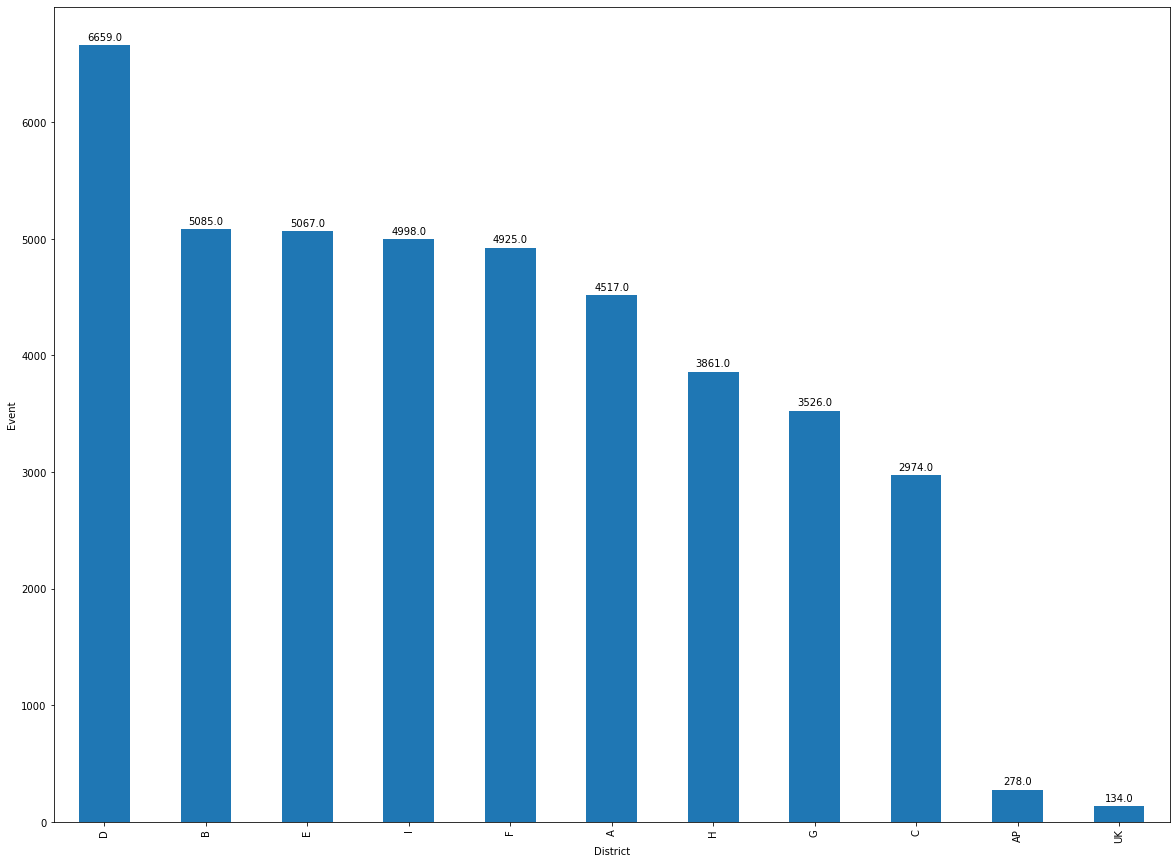

In [26]:
district_values = pd.value_counts(df_t1['district'])
plots = district_values.plot(kind="bar")
_=plt.xlabel('District')
_=plt.ylabel('Event')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.1f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.show()

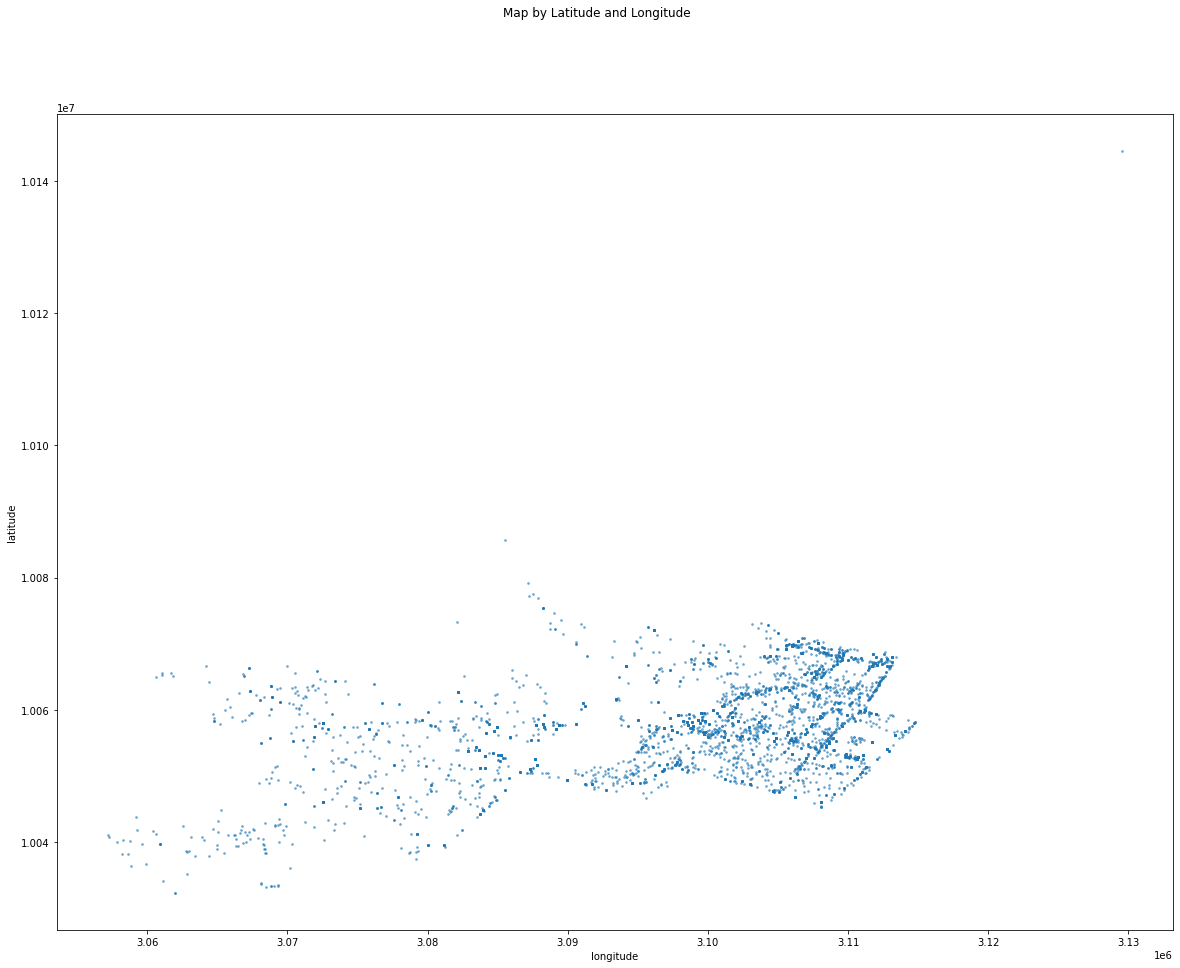

In [27]:
max_theft = df_t1.loc[df_t1['district'] == 'D']
fig, ax = plt.subplots()
ax.scatter(max_theft['x_coordinate'].values, max_theft['y_coordinate'].values,
             s=3, label='map', alpha=0.5)
fig.suptitle('Map by Latitude and Longitude')

ax.set_ylabel('latitude')
ax.set_xlabel('longitude')

plt.show()

In [28]:
df['color1'] = df.apply(lambda x:'red' if x['Type1'] == True and x['district'] == 'D' else 'skyblue',axis=1)

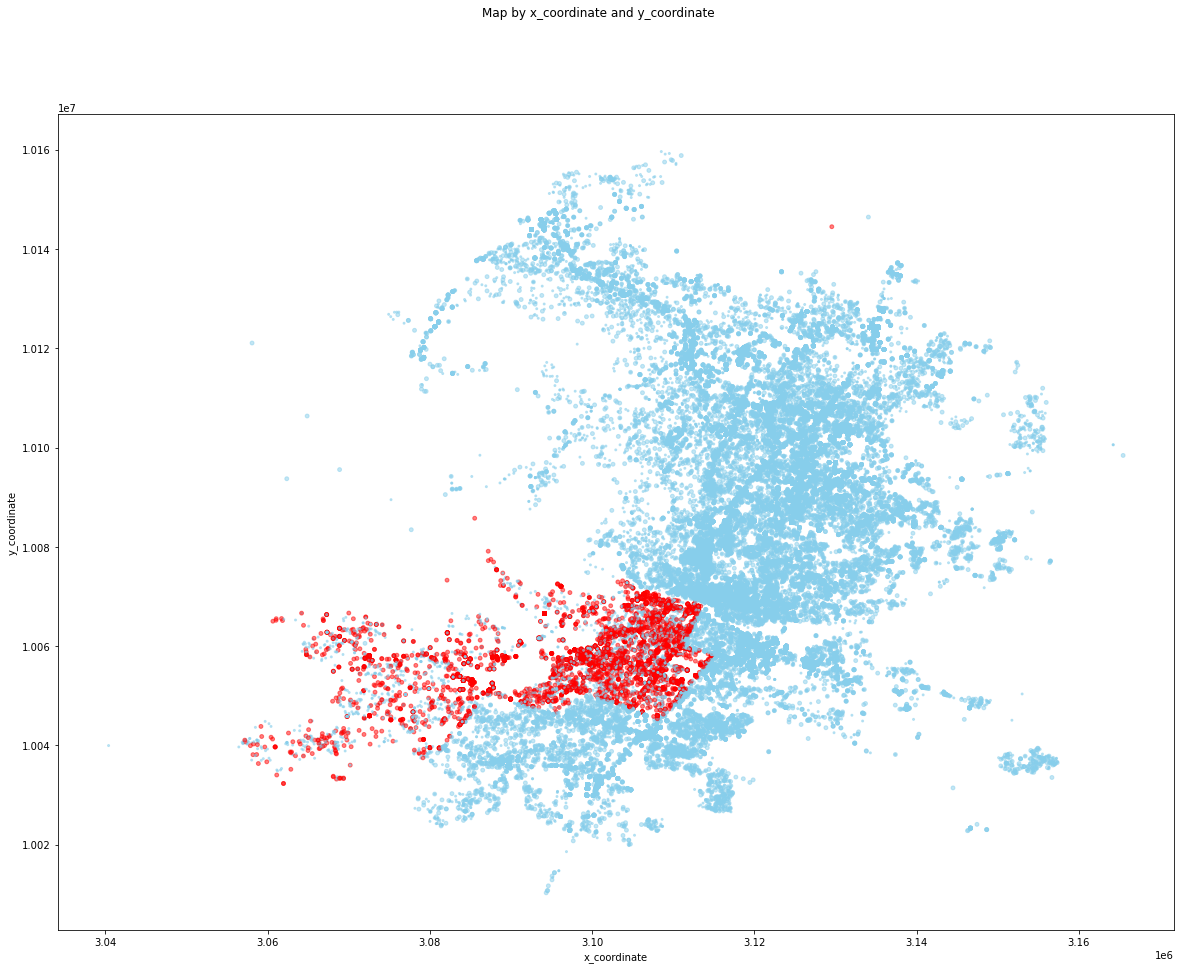

In [29]:
fig, ax = plt.subplots()
ax.scatter(df['x_coordinate'].values, df['y_coordinate'].values,
             s=3+ pow(12,df['Type1'].astype('int')), c=df.color1, label='map', alpha=0.5)
fig.suptitle('Map by x_coordinate and y_coordinate')

ax.set_ylabel('y_coordinate')
ax.set_xlabel('x_coordinate')

plt.show()

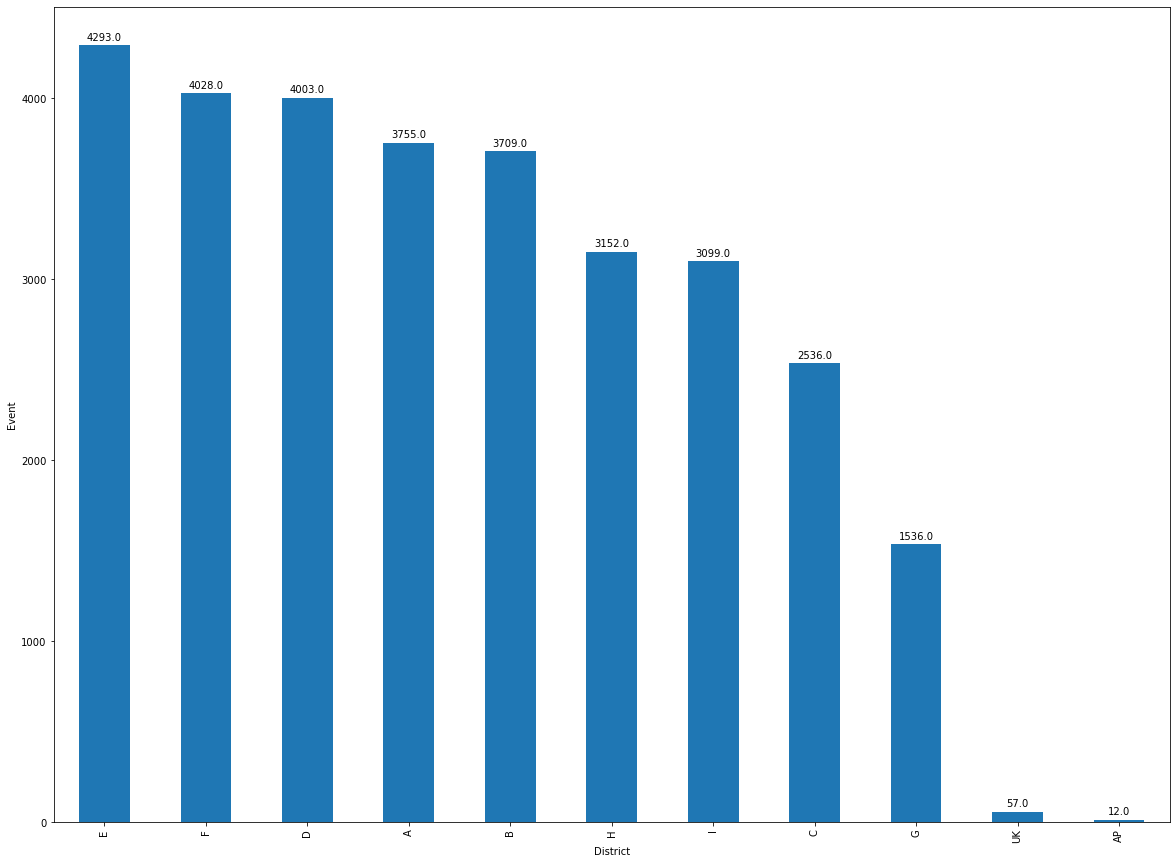

In [30]:
district_values =pd.value_counts(df_t2['district'])
plots = district_values.plot(kind="bar")
_=plt.xlabel('District')
_=plt.ylabel('Event')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.1f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

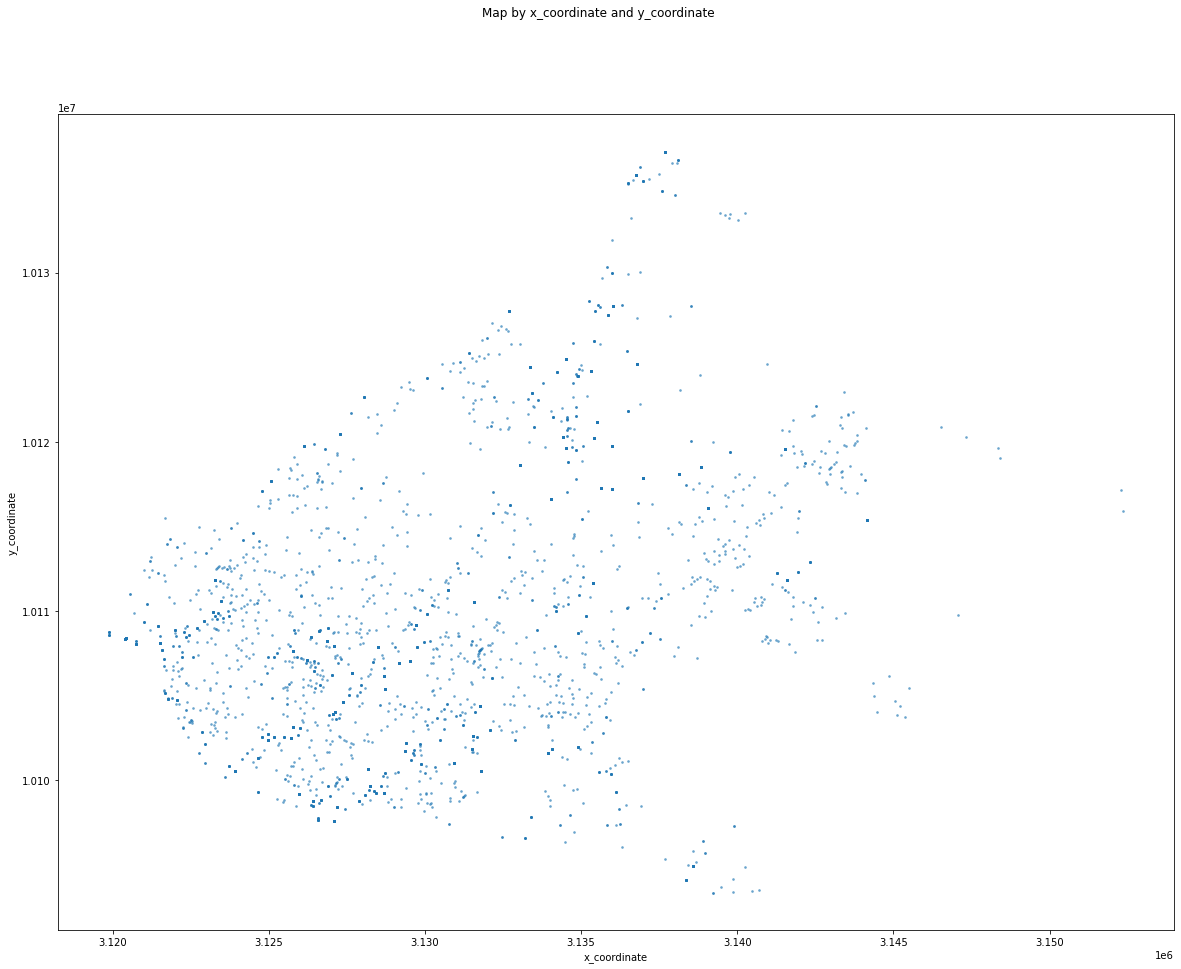

In [31]:
max_burg = df_t2.loc[df_t2['district'] == 'E']
fig, ax = plt.subplots()
ax.scatter(max_burg['x_coordinate'].values, max_burg['y_coordinate'].values,
             s=3, label='map', alpha=0.5)
fig.suptitle('Map by x_coordinate and y_coordinate')

ax.set_ylabel('y_coordinate')
ax.set_xlabel('x_coordinate')

plt.show()

In [32]:
df_t2['color2'] = df_t2.apply(lambda x:'red' if x['Type2'] == True and x['district'] == 'E' else 'skyblue',axis=1)

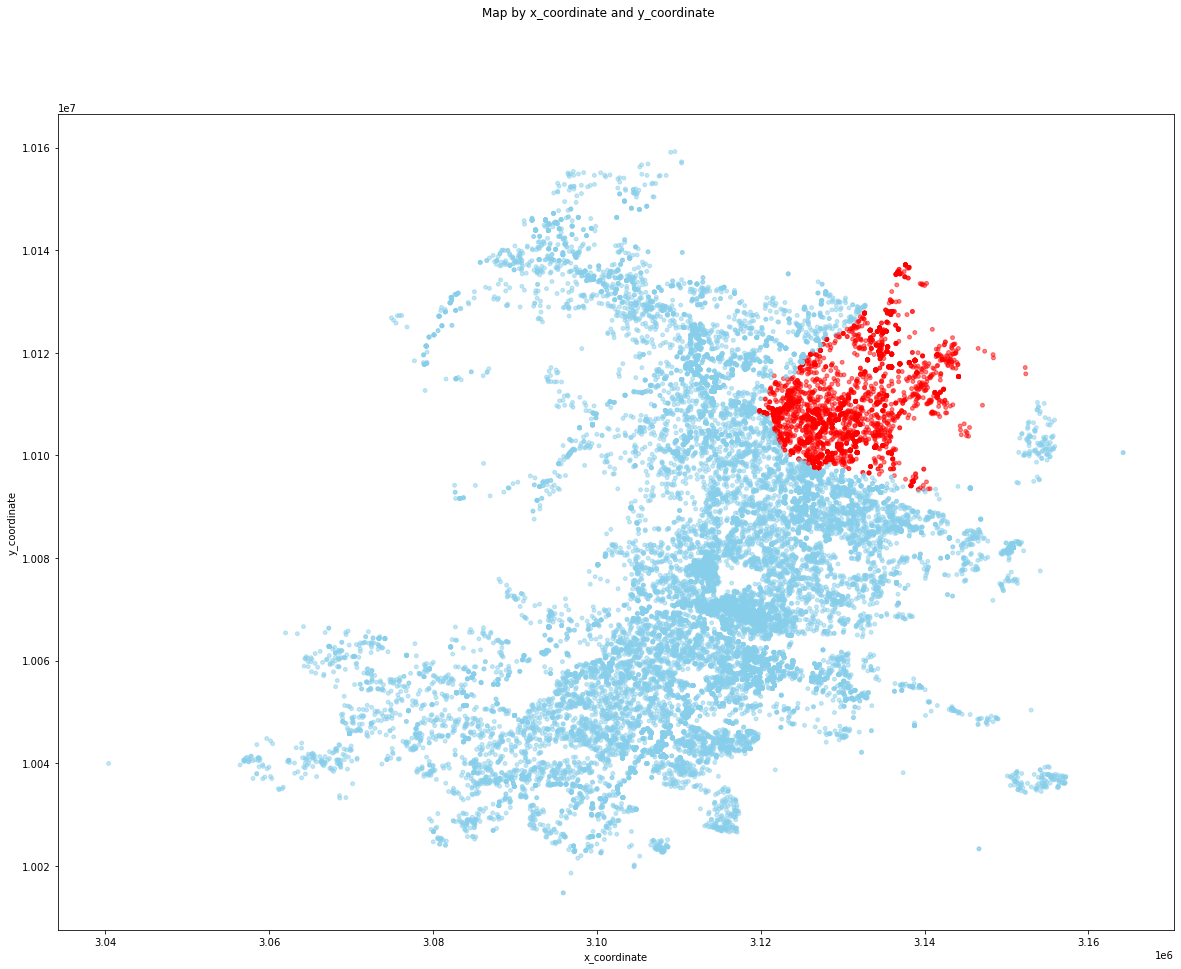

In [33]:
fig, ax = plt.subplots()
ax.scatter(df_t2['x_coordinate'].values, df_t2['y_coordinate'].values,
             s=3+ pow(12,df_t2['Type2'].astype('int')), c=df_t2.color2, label='map', alpha=0.5)
fig.suptitle('Map by x_coordinate and y_coordinate')

ax.set_ylabel('y_coordinate')
ax.set_xlabel('x_coordinate')

plt.show()

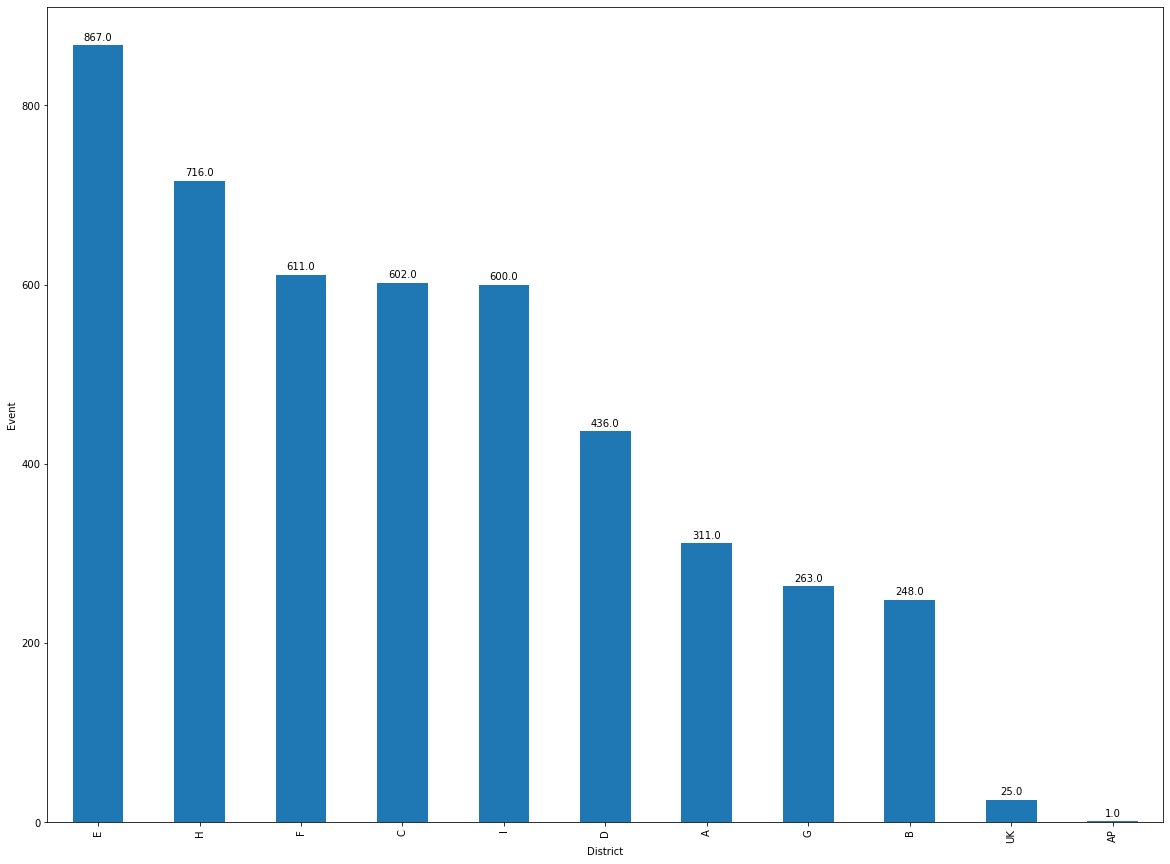

In [34]:
district_values =pd.value_counts(df_t3['district'])
plots = district_values.plot(kind="bar")
_=plt.xlabel('District')
_=plt.ylabel('Event')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.1f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

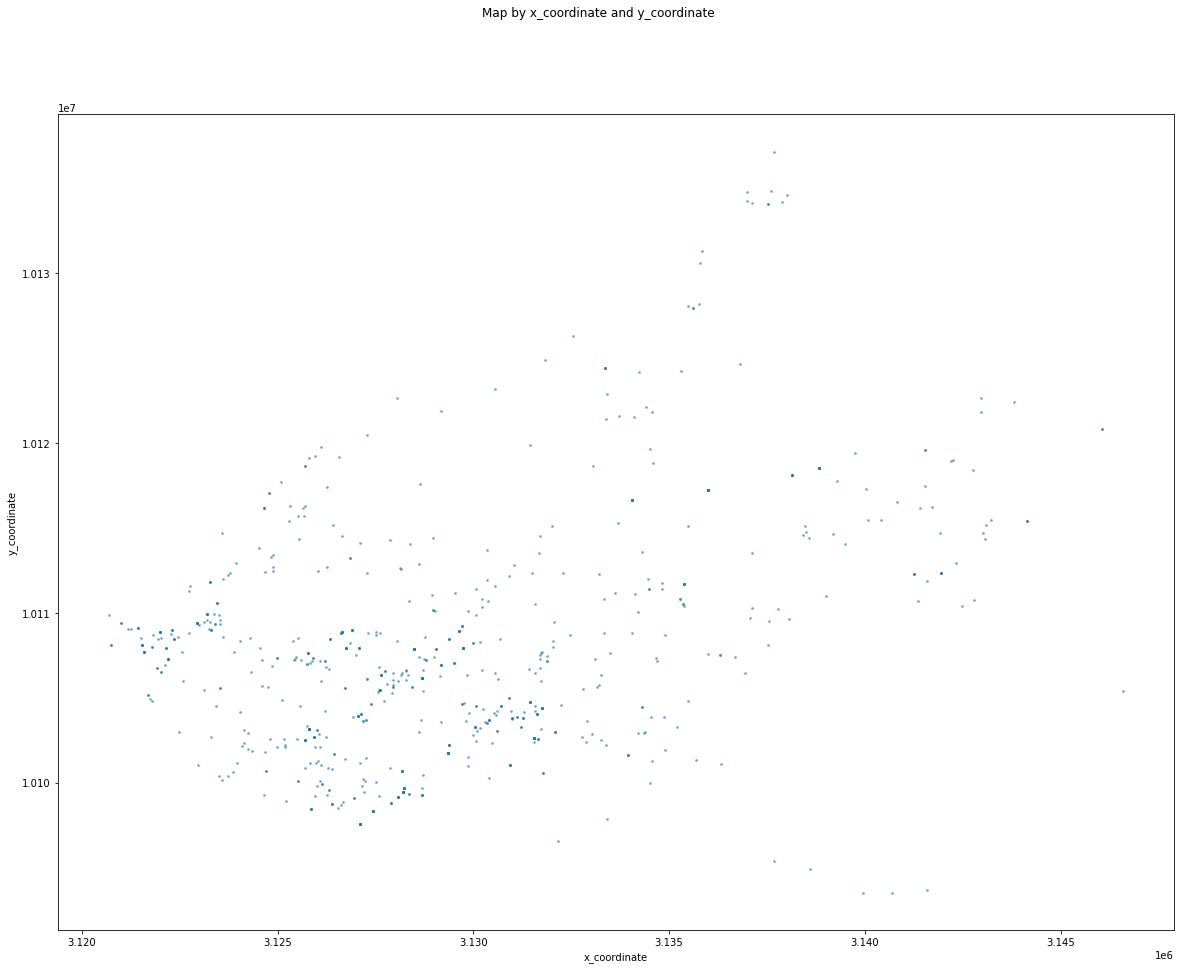

In [35]:
max_agg= df_t3.loc[df_t3['district'] == 'E']
fig, ax = plt.subplots()
ax.scatter(max_agg['x_coordinate'].values, max_agg['y_coordinate'].values,
             s=3, label='map', alpha=0.5)
fig.suptitle('Map by x_coordinate and y_coordinate')

ax.set_ylabel('y_coordinate')
ax.set_xlabel('x_coordinate')

plt.show()

In [36]:
df_t3['color3'] = df_t3.apply(lambda x:'red' if x['Type3'] == True and x['district'] == 'E' else 'skyblue',axis=1)

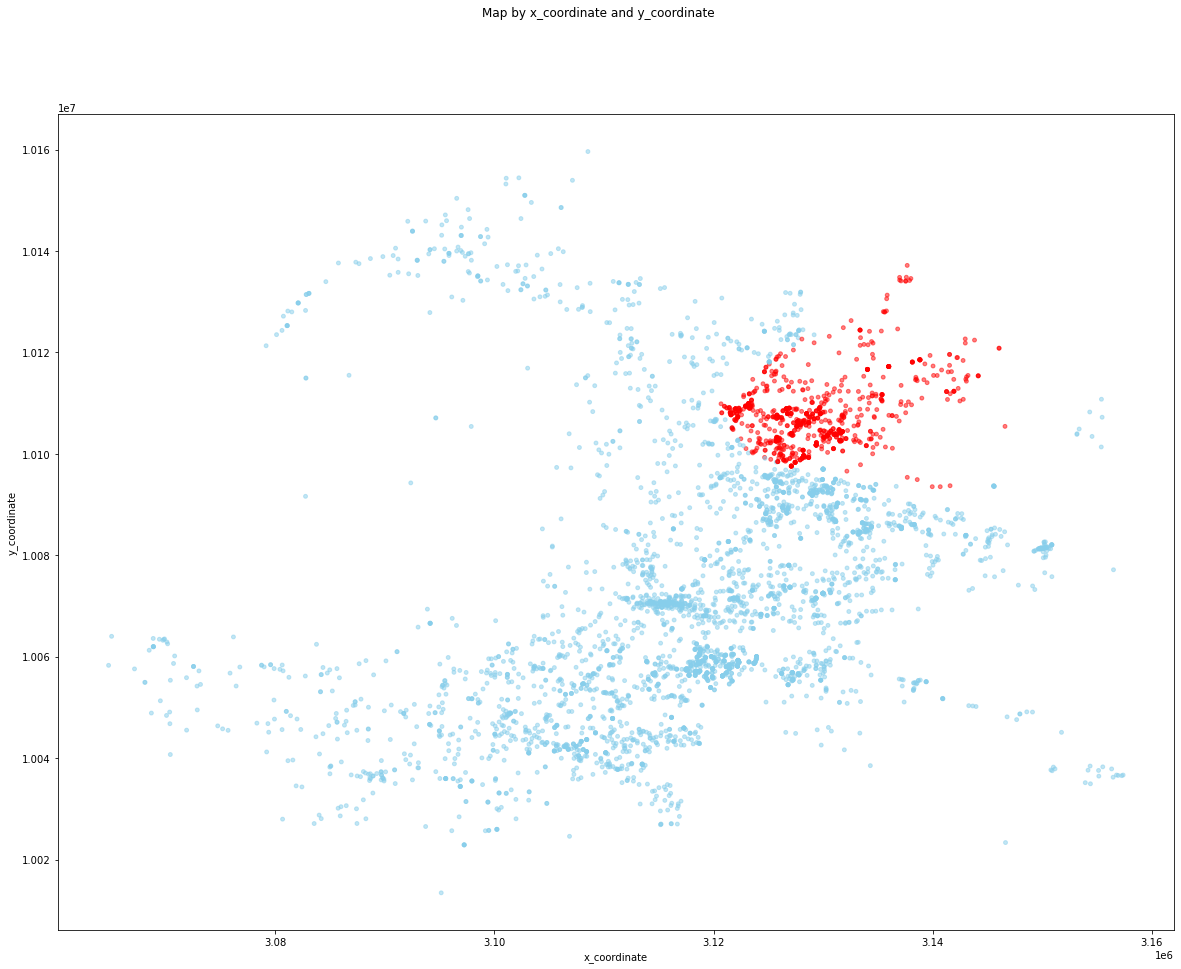

In [37]:
fig, ax = plt.subplots()
ax.scatter(df_t3['x_coordinate'].values, df_t3['y_coordinate'].values,
             s=3+ pow(12,df_t3['Type3'].astype('int')), c=df_t3.color3, label='map', alpha=0.5)
fig.suptitle('Map by x_coordinate and y_coordinate')

ax.set_ylabel('y_coordinate')
ax.set_xlabel('x_coordinate')

plt.show()

In [38]:
df_t4.loc[df_t4['district'] == 'E']

,address,census_tract,clearance_date,clearance_status,council_district_code,description,district,latitude,location,location_description,...,x_coordinate,y_coordinate,year,zipcode,Type1,Type2,Type3,Type4,Type5,Type6
6,8800 N IH 35 SVRD SB Austin TX 78753,18.059999999999999,2015-01-29 00:00:00,Cleared by Arrest,4.0,MURDER,E,NaN,NaN,8800 N IH 35 SVRD SB,...,3129363.0,10101734.0,2015.0,78753.0,False,False,False,True,False,False
7,(30.359502 -97.68525),18.329999999999998,2014-12-12 00:00:00,Not cleared,4.0,MURDER,E,30.359502,(30.359502-97.68525),9601 MIDDLE FISKVILLE RD,...,3131764.0,10104394.0,2014.0,78753.0,False,False,False,True,False,False
11,Austin TX 78753,18.059999999999999,2014-07-21 00:00:00,Cleared by Arrest,4.0,MURDER,E,NaN,NaN,9220 N IH 35 SVRD SB,...,3130401.0,10103687.0,2014.0,78753.0,False,False,False,True,False,False
14,8500 E US 290 HWY SVRD WB Austin TX 78754,18.34,NaN,NaN,1.0,MURDER,E,NaN,NaN,8500 E US 290 HWY SVRD WB,...,3139530.0,10093394.0,2015.0,78754.0,False,False,False,True,False,False
17,7800 N IH 35 SVRD SB Austin TX 78753,18.04,2016-03-15 00:00:00,Cleared by Arrest,4.0,MURDER,E,NaN,NaN,7800 N IH 35 SVRD SB,...,3127097.0,10097584.0,2015.0,78753.0,False,False,False,True,False,False
21,(30.347704 -97.70352),18.059999999999999,2014-11-10 00:00:00,Cleared by Arrest,4.0,MURDER,E,30.347704,(30.347704-97.70352),102 W POWELL LN,...,3126082.0,10100114.0,2014.0,78753.0,False,False,False,True,False,False
34,309 DEEN AVE Austin TX 78753,18.059999999999999,2015-03-17 00:00:00,Cleared by Arrest,4.0,MURDER,E,NaN,NaN,309 DEEN AVE,...,3127041.0,10102585.0,2015.0,78753.0,False,False,False,True,False,False
39,(30.351112 -97.700746),18.059999999999999,2014-12-09 00:00:00,Cleared by Arrest,4.0,MURDER,E,30.351112,(30.351112-97.700746),8500 GEORGIAN DR,...,3126815.0,10101318.0,2014.0,78753.0,False,False,False,True,False,False
46,1735 RUTLAND DR Austin TX 78758,18.2,2015-04-03 00:00:00,Cleared by Arrest,4.0,MURDER,E,NaN,NaN,1735 RUTLAND DR,...,3123464.0,10110594.0,2015.0,78758.0,False,False,False,True,False,False


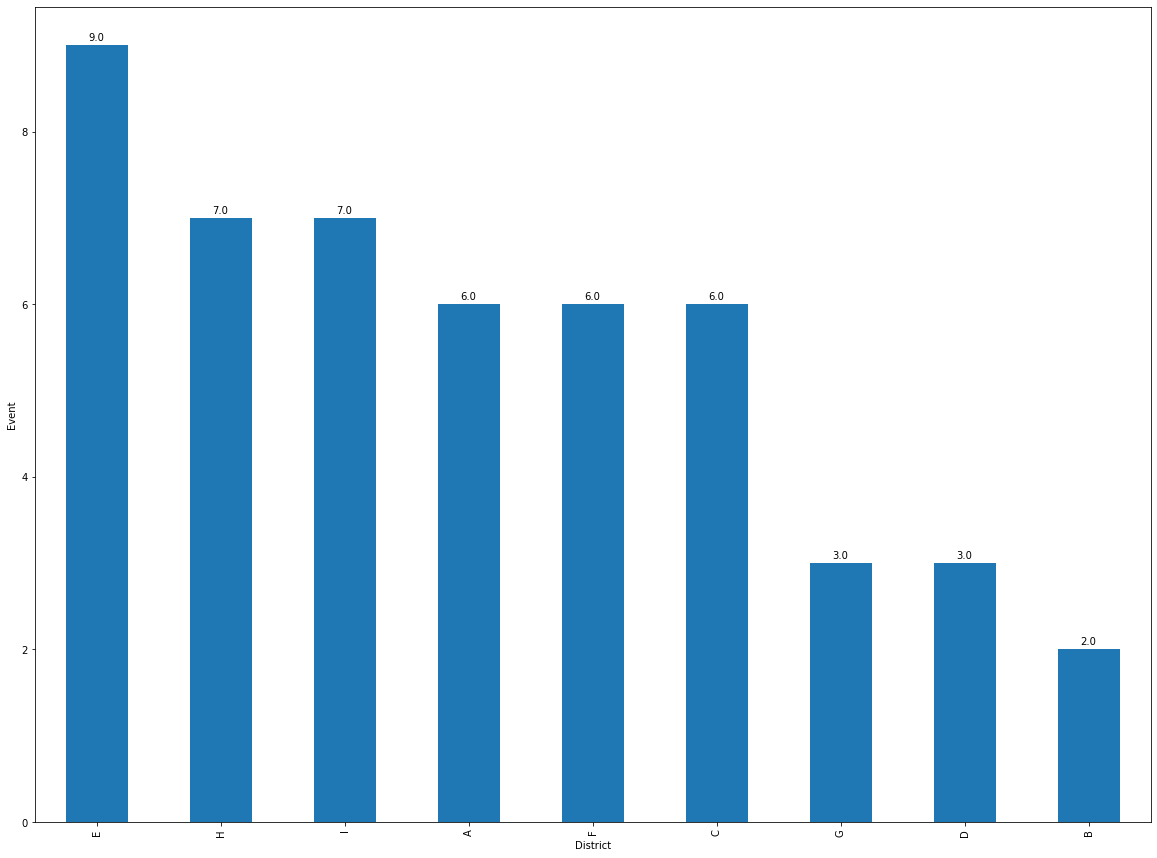

In [39]:
district_values =pd.value_counts(df_t4['district'])
plots = district_values.plot(kind="bar")
_=plt.xlabel('District')
_=plt.ylabel('Event')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.1f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

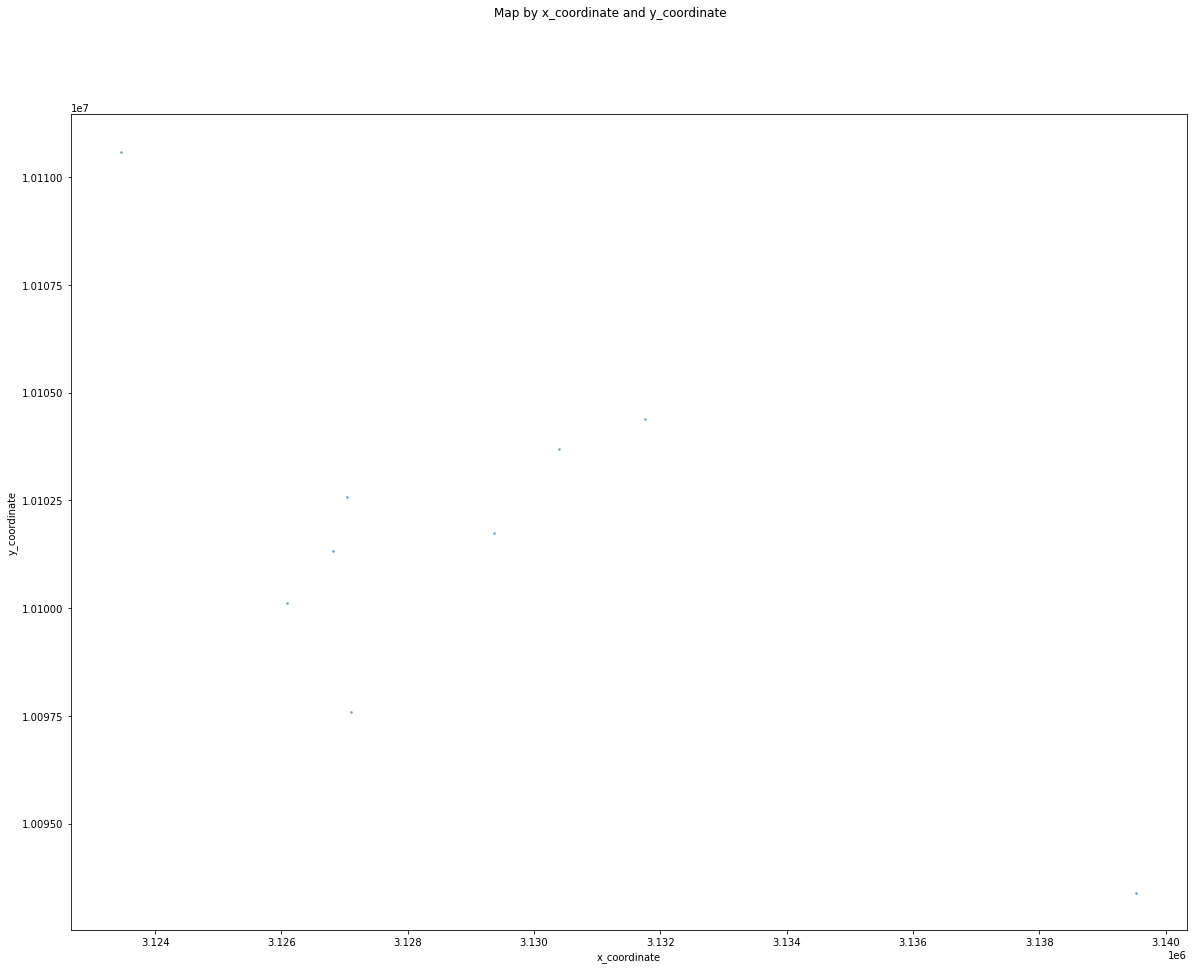

In [40]:
max_mur = df_t4.loc[df_t4['district'] == 'E']
fig, ax = plt.subplots()
ax.scatter(max_mur['x_coordinate'].values, max_mur['y_coordinate'].values,
             s=3, label='map', alpha=0.5)
fig.suptitle('Map by x_coordinate and y_coordinate')

ax.set_ylabel('y_coordinate')
ax.set_xlabel('x_coordinate')

plt.show()

In [41]:
df['color4'] = df.apply(lambda x:'red' if x['Type4'] == True and x['district'] == 'E' else 'skyblue',axis=1)

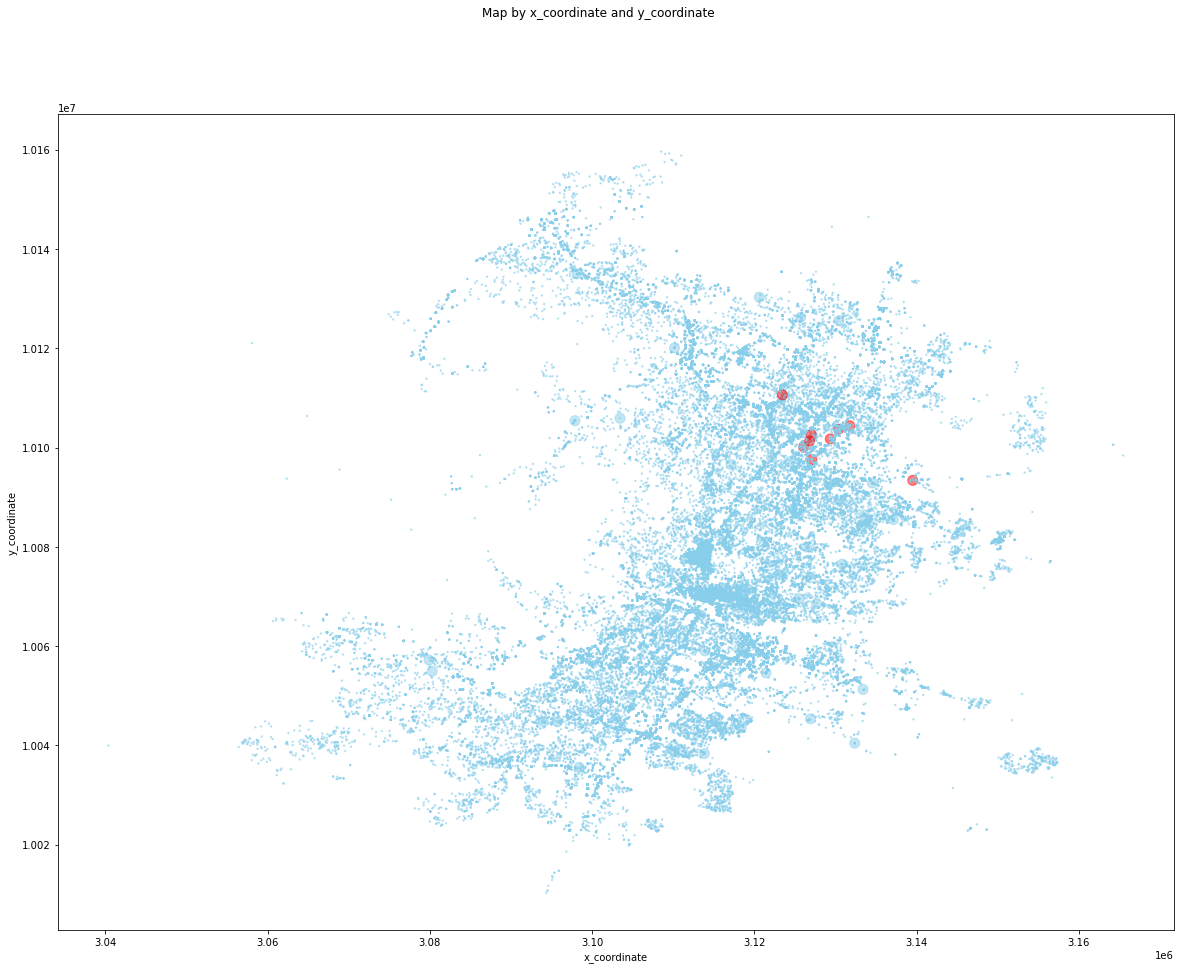

In [42]:
fig, ax = plt.subplots()
ax.scatter(df['x_coordinate'].values, df['y_coordinate'].values,
             s=1+ pow(100,df['Type4'].astype('int')), c=df.color4, label='map', alpha=0.5)
fig.suptitle('Map by x_coordinate and y_coordinate')

ax.set_ylabel('y_coordinate')
ax.set_xlabel('x_coordinate')

plt.show()

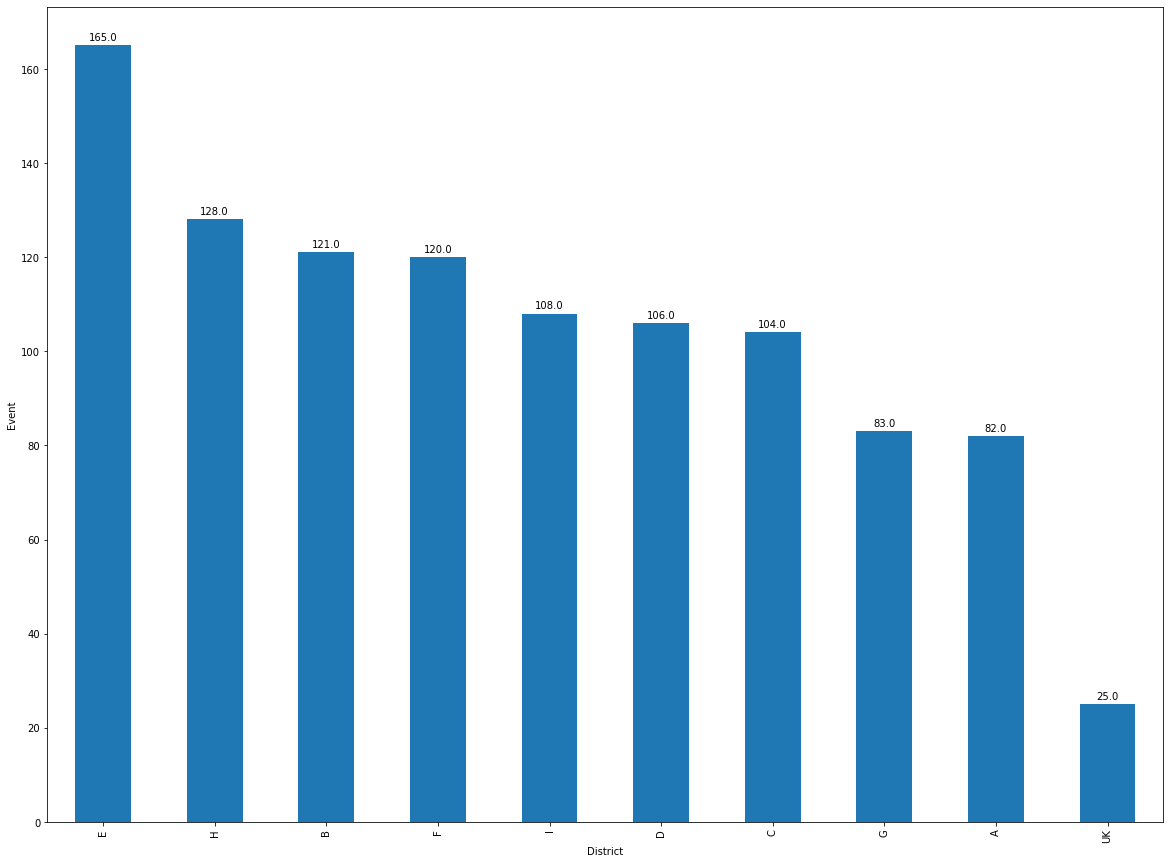

In [43]:
district_values =pd.value_counts(df_t5['district'])
plots =district_values.plot(kind="bar")
_=plt.xlabel('District')
_=plt.ylabel('Event')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.1f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

In [44]:
df_t5.loc[~df_t5['latitude'].isna()]

,address,census_tract,clearance_date,clearance_status,council_district_code,description,district,latitude,location,location_description,...,x_coordinate,y_coordinate,year,zipcode,Type1,Type2,Type3,Type4,Type5,Type6
3,(30.40316 -97.753727),17.22,2014-11-13 00:00:00,Cleared by Exception,10.0,RAPE,A,30.403160,(30.40316-97.753727),NaN,...,NaN,NaN,2014.0,78759.0,False,False,False,False,True,False
5,(30.206782 -97.798214),24.02,2014-03-04 00:00:00,Not cleared,3.0,RAPE OF A CHILD,D,30.206782,(30.206782-97.798214),NaN,...,NaN,NaN,2014.0,78745.0,False,False,False,False,True,False
7,(30.271191 -97.741791),7,2014-08-22 00:00:00,Not cleared,9.0,AGG RAPE,B,30.271191,(30.271191-97.741791),NaN,...,NaN,NaN,2014.0,78701.0,False,False,True,False,True,False
9,(30.186349 -97.738673),24.19,2014-06-19 00:00:00,Cleared by Exception,2.0,RAPE OF A CHILD,F,30.186349,(30.186349-97.738673),NaN,...,NaN,NaN,2014.0,78744.0,False,False,False,False,True,False
11,(30.30723 -97.686715),3.06,2014-06-12 00:00:00,Cleared by Arrest,9.0,AGG RAPE OF A CHILD,B,30.307230,(30.30723-97.686715),NaN,...,NaN,NaN,2014.0,78723.0,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,(30.349869 -97.732706),15.01,2014-04-03 00:00:00,Cleared by Arrest,7.0,RAPE OF A CHILD,B,30.349869,(30.349869-97.732706),NaN,...,NaN,NaN,2014.0,78757.0,False,False,False,False,True,False
1032,(30.227985 -97.716971),23.14,2014-10-07 00:00:00,Cleared by Exception,3.0,AGG RAPE,H,30.227985,(30.227985-97.716971),NaN,...,NaN,NaN,2014.0,78741.0,False,False,True,False,True,False
1034,(30.157123 -97.611102),24.33,2014-06-20 00:00:00,Cleared by Arrest,2.0,AGG RAPE OF A CHILD,H,30.157123,(30.157123-97.611102),NaN,...,NaN,NaN,2014.0,78617.0,False,False,True,False,True,False
1038,(30.270568 -97.683892),21.11,2015-03-03 00:00:00,Cleared by Arrest,1.0,AGG RAPE OF A CHILD,C,30.270568,(30.270568-97.683892),NaN,...,NaN,NaN,2014.0,78721.0,False,False,True,False,True,False


In [45]:
df_t5.loc[~df_t5['x_coordinate'].isna()]

,address,census_tract,clearance_date,clearance_status,council_district_code,description,district,latitude,location,location_description,...,x_coordinate,y_coordinate,year,zipcode,Type1,Type2,Type3,Type4,Type5,Type6


ข้อมูลมีเพียง latitude, longtitude จึงเปลี่ยนมใช้แทนที่ x,y coordinate

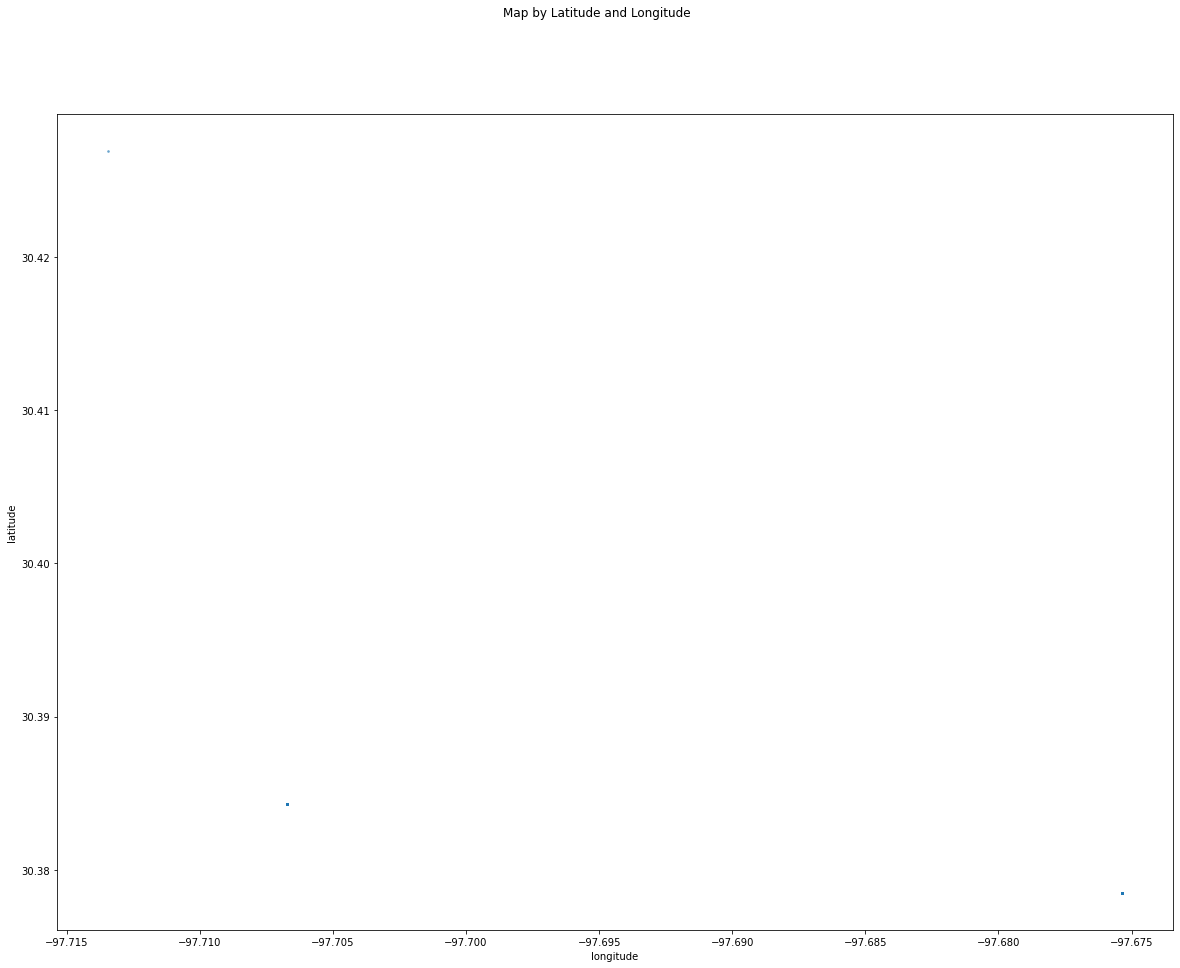

In [46]:
max_rape = df_t5.loc[df_t5['district'] == 'E']
fig, ax = plt.subplots()
ax.scatter(max_rape['longitude'].values, max_rape['latitude'].values,
             s=3, label='map', alpha=0.5)
fig.suptitle('Map by Latitude and Longitude')

ax.set_ylabel('latitude')
ax.set_xlabel('longitude')

plt.show()

In [47]:
df['color5'] = df.apply(lambda x:'red' if x['Type5'] == True and x['district'] == 'E' else 'skyblue',axis=1)

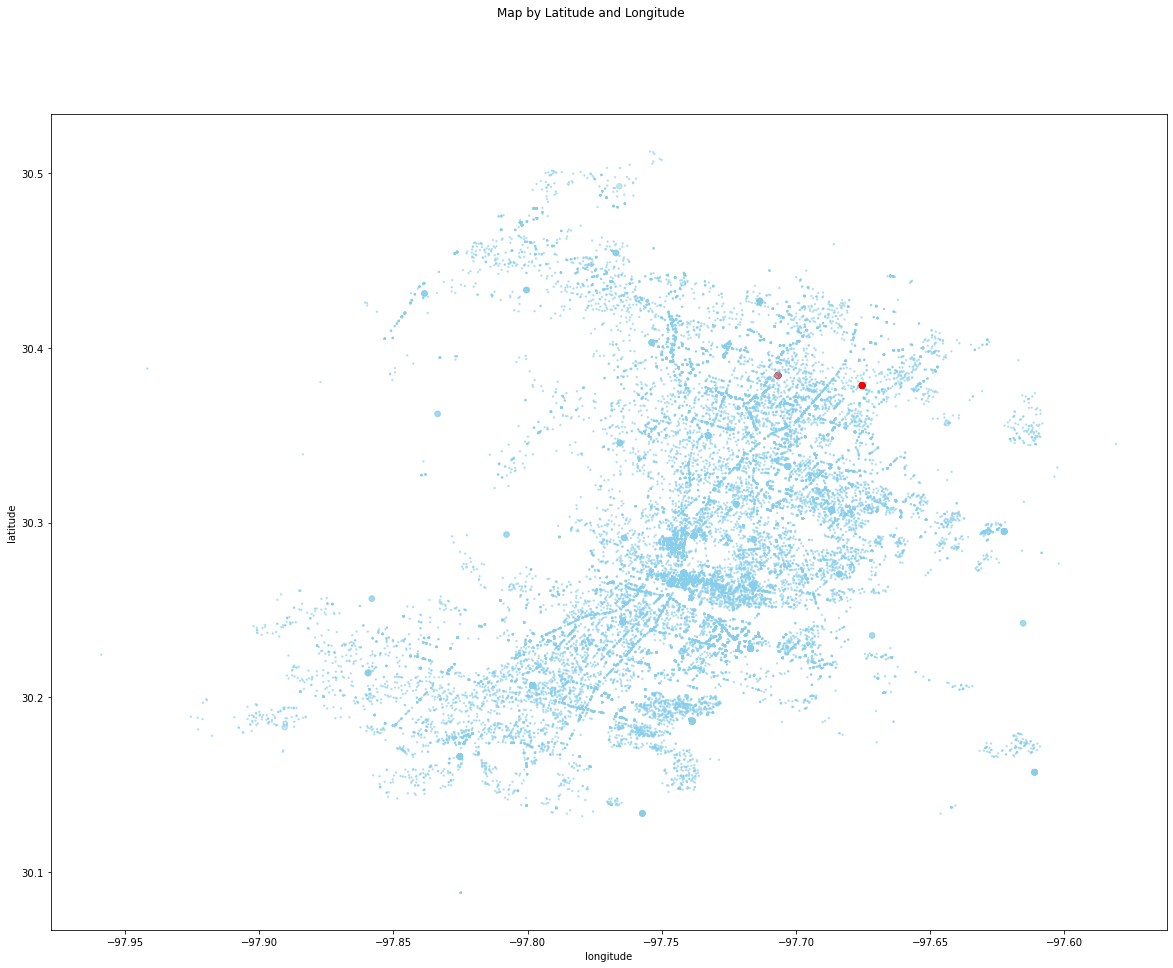

In [48]:
fig, ax = plt.subplots()
ax.scatter(df['longitude'].values, df['latitude'].values,
             s=1+ pow(30,df['Type5'].astype('int')), c=df.color5, label='map', alpha=0.5)
fig.suptitle('Map by Latitude and Longitude')

ax.set_ylabel('latitude')
ax.set_xlabel('longitude')

plt.show()

In [49]:
df_t5.loc[df_t5['district'] == 'E'].loc[~df_t5['latitude'].isna()]['latitude'].unique()

array([30.378511, 30.384311, 30.426879])

เนื่องจากจุดอยู่ใกล้กันมากจึงมองเห็นเพียงสองจุดจาก 3 จุด

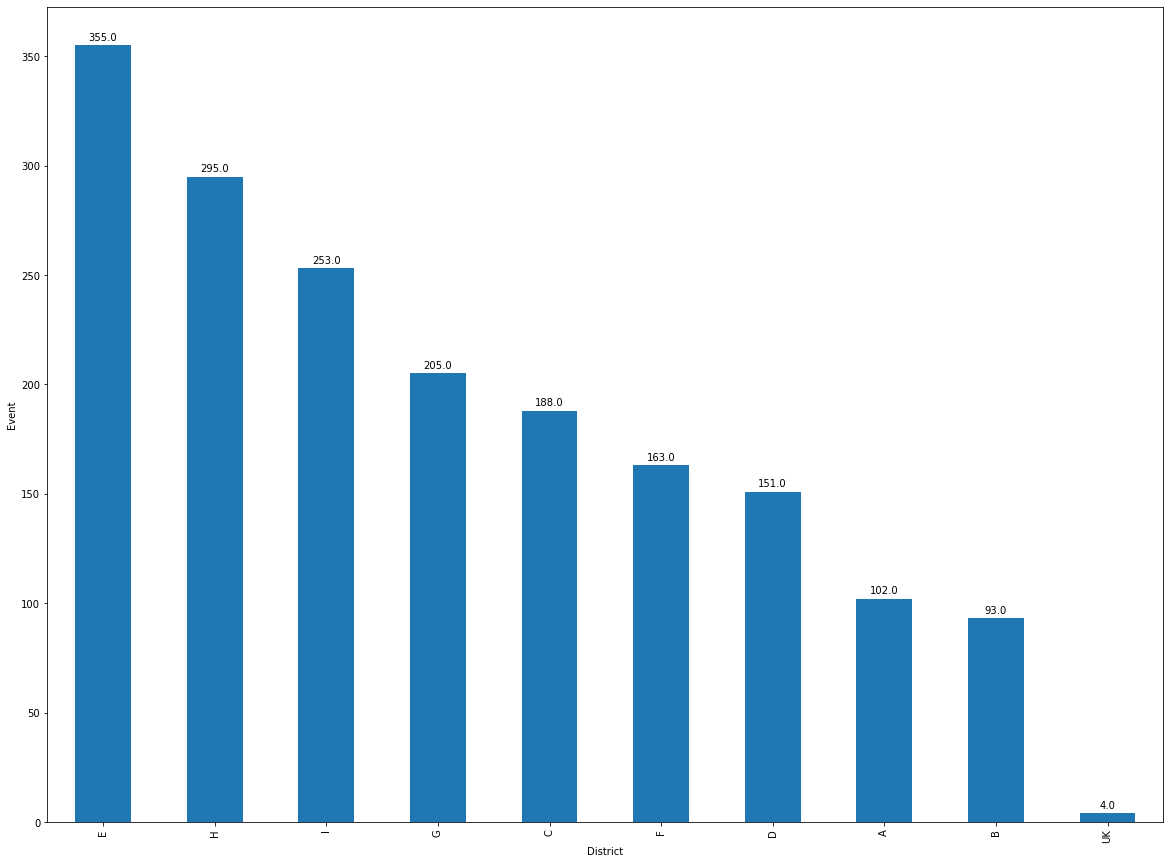

In [50]:
district_values =pd.value_counts(df_t6['district'])
plots = district_values.plot(kind="bar")
_=plt.xlabel('District')
_=plt.ylabel('Event')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.1f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

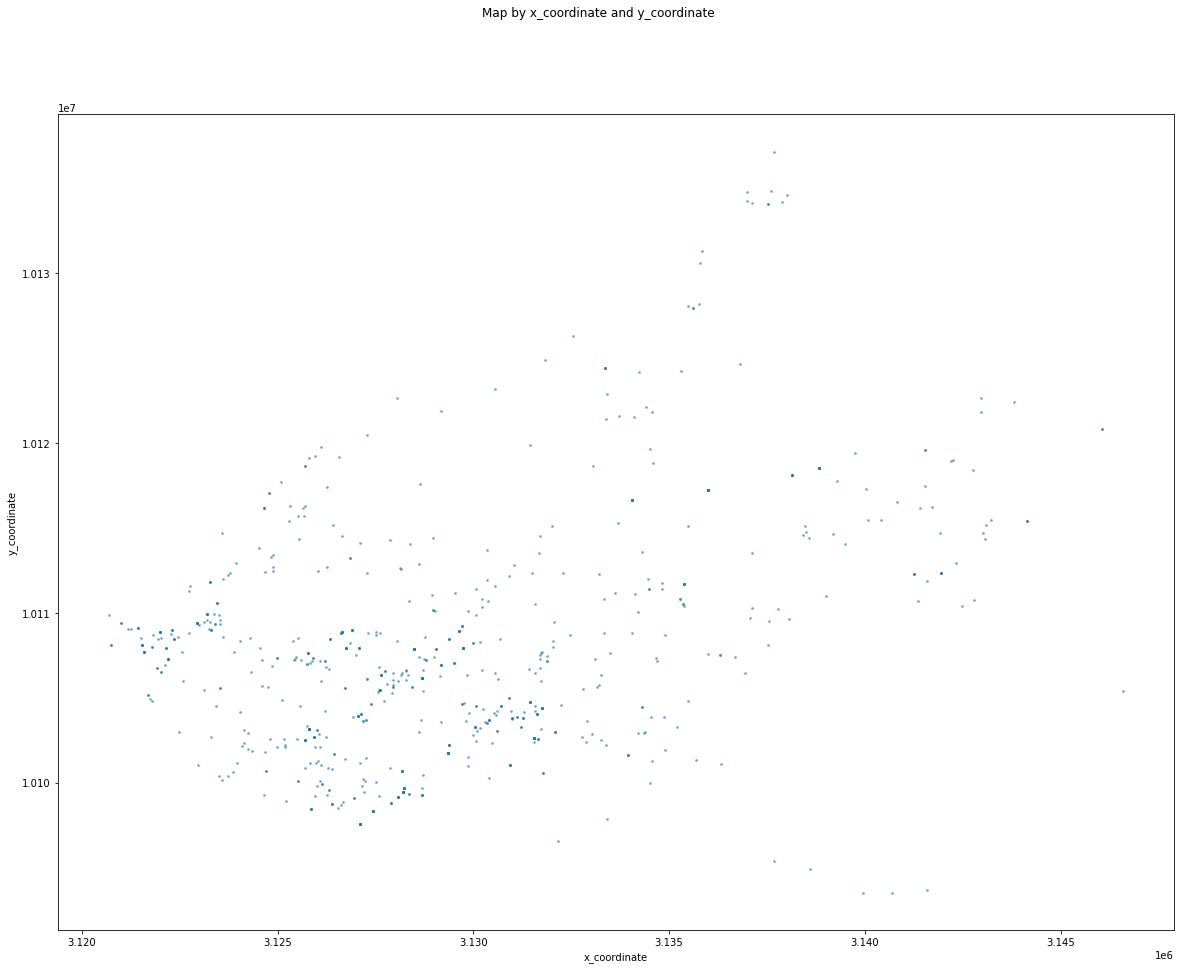

In [51]:
max_rob = df_t6.loc[df_t6['district'] == 'E']
fig, ax = plt.subplots()
ax.scatter(max_agg['x_coordinate'].values, max_agg['y_coordinate'].values,
             s=3, label='map', alpha=0.5)
fig.suptitle('Map by x_coordinate and y_coordinate')

ax.set_ylabel('y_coordinate')
ax.set_xlabel('x_coordinate')

plt.show()

In [52]:
df['color6'] = df.apply(lambda x:'red' if x['Type6'] == True and x['district'] == 'E' else 'skyblue',axis=1)

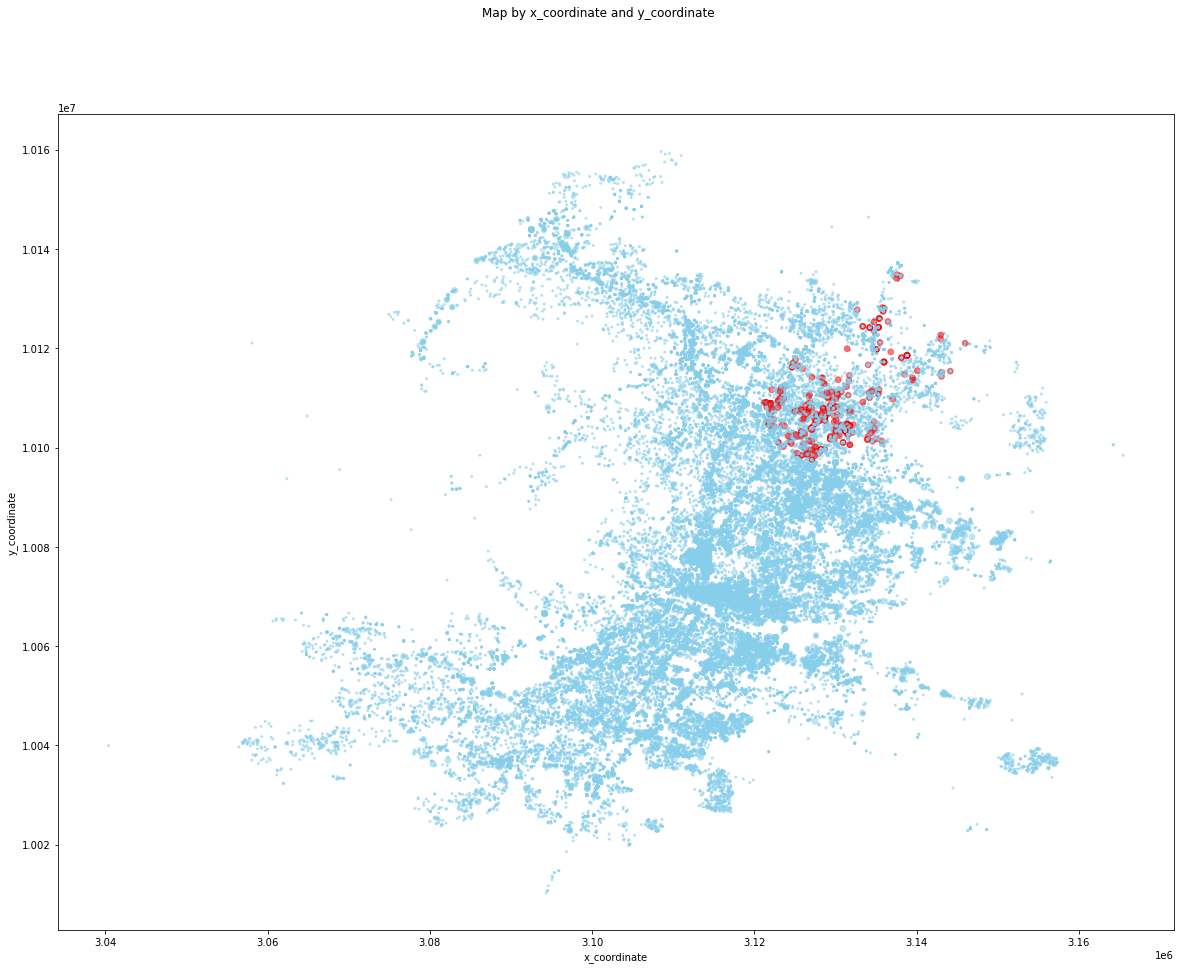

In [53]:
fig, ax = plt.subplots()
ax.scatter(df['x_coordinate'].values, df['y_coordinate'].values,
             s=3+ pow(30,df['Type6'].astype('int')), c=df.color6, label='map', alpha=0.5)
fig.suptitle('Map by x_coordinate and y_coordinate')

ax.set_ylabel('y_coordinate')
ax.set_xlabel('x_coordinate')

plt.show()

### 2.ความถี่ของอาชญากรรมเมื่ออิงจากสภาพเศษฐกิจ

แปลงค่า timestamp ให้อยู่ในรูป Datetime

In [54]:
df['timestamp'] = pd.to_datetime(df['timestamp'],errors='coerce')

In [55]:
df['timestamp']

0        2015-12-13
1        2015-09-03
2               NaT
3               NaT
4        2014-04-04
            ...    
159456   2014-12-28
159459   2014-06-03
159460   2015-12-30
159461          NaT
159463   2014-06-30
Name: timestamp, Length: 102158, dtype: datetime64[ns]

In [56]:
df_2014= df[pd.notnull(df['timestamp'])].loc[df.timestamp.dt.year == 2014]

In [57]:
df_2015= df[pd.notnull(df['timestamp'])].loc[df.timestamp.dt.year == 2015]

In [60]:
df[pd.notnull(df['timestamp'])].loc[df.timestamp.dt.year == 2016]

,address,census_tract,clearance_date,clearance_status,council_district_code,description,district,latitude,location,location_description,...,Type1,Type2,Type3,Type4,Type5,Type6,color1,color4,color5,color6


U.S. Bureau of Economic Analysis, Gross Domestic Product: All Industry Total in Texas [TXNGSP], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/TXNGSP, October 13, 2022.

In [61]:
gdp = pd.read_csv('TXNGSP.csv')
gdp

,DATE,TXNGSP
0,1997-01-01,610157.3
1,1998-01-01,645142.6
2,1999-01-01,679870.3
3,2000-01-01,738677.0
4,2001-01-01,773375.5
5,2002-01-01,789817.6
6,2003-01-01,833342.3
7,2004-01-01,913444.4
8,2005-01-01,995252.4
9,2006-01-01,1103197.6


In [62]:
gdp['DATE'] = pd.to_datetime(gdp['DATE'] )

In [64]:
num_2014=  df_2014.loc[pd.notnull(df_2014['description'])].drop_duplicates().description.count()
num_2015=  df_2015.loc[pd.notnull(df_2015['description'])].drop_duplicates().description.count()


In [65]:
gdp['CRIME_SUM'] = 0

In [66]:
gdp.loc[17,'CRIME_SUM'] = num_2014
gdp.loc[18,'CRIME_SUM'] = num_2015

In [67]:
gdp

,DATE,TXNGSP,CRIME_SUM
0,1997-01-01,610157.3,0
1,1998-01-01,645142.6,0
2,1999-01-01,679870.3,0
3,2000-01-01,738677.0,0
4,2001-01-01,773375.5,0
5,2002-01-01,789817.6,0
6,2003-01-01,833342.3,0
7,2004-01-01,913444.4,0
8,2005-01-01,995252.4,0
9,2006-01-01,1103197.6,0


เนื่องจากข้อมูลมีขนาดต่างกันมาก เพื่อต้องการให้เห็นแนวโน้มของข้อมูลชุดขึ้นจึง scale ข้อมูลโดยใช้ MinMaxScaler

In [68]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
data = trans.fit_transform(gdp[['TXNGSP','CRIME_SUM']])

In [69]:
gdp2 = pd.concat([gdp,pd.DataFrame(data)],axis=1)

In [70]:
gdp2.rename(columns={0:'TXNGSP_Scale',1:'CRIME_SUM_Scale'},inplace=True)

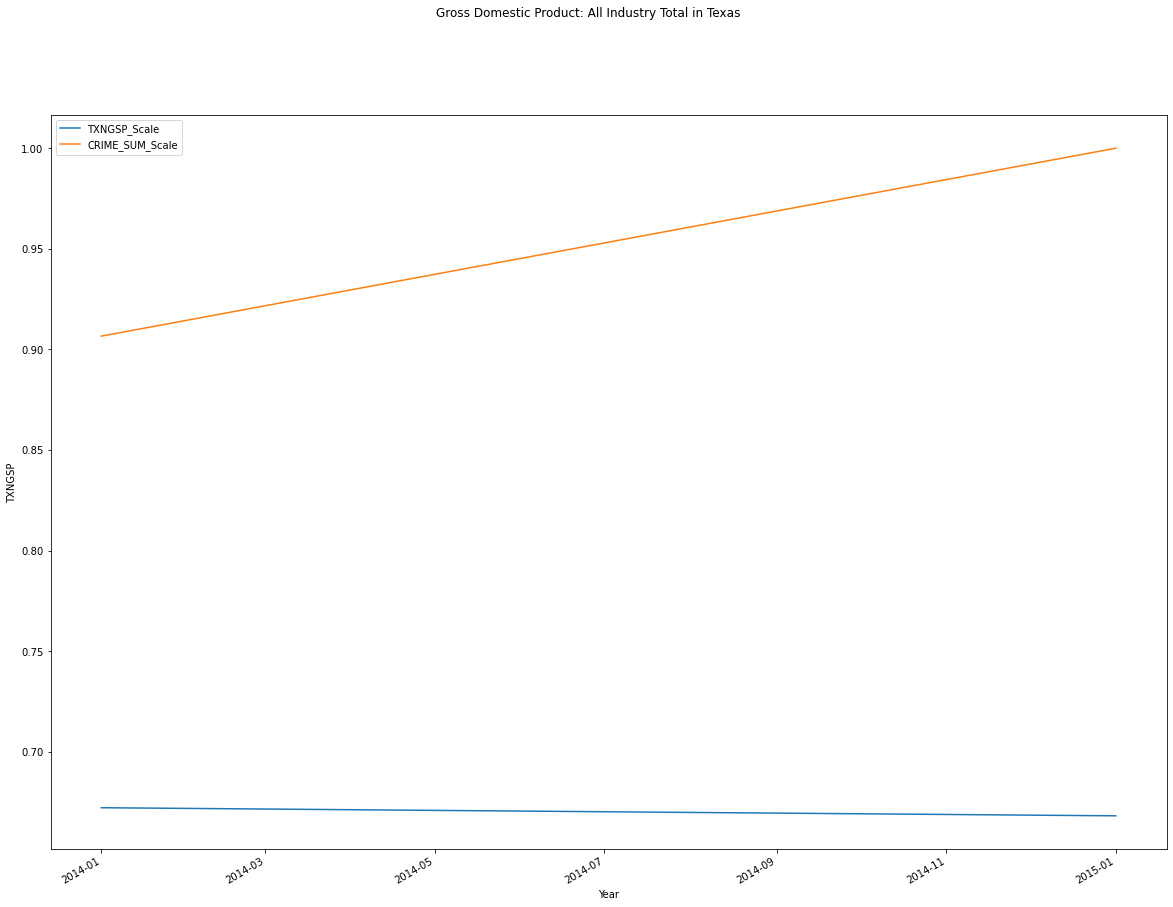

In [71]:
gdp2.loc[17:18,].plot(x='DATE',y=['TXNGSP_Scale','CRIME_SUM_Scale'])
plt.suptitle('Gross Domestic Product: All Industry Total in Texas ')
_=plt.xlabel('Year')
_=plt.ylabel('TXNGSP')

plt.show()
